In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2

# Load MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize to [0,1]
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Split training set into train and validation (80% train, 20% val)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Data Augmentation

In [6]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

# Define VGGNet-inspired model

In [7]:
def create_vgg_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(28, 28, 1)),

        # Block 1
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        # Block 2
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        # Block 3
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')  # Output for 10 classes
    ])
    
    return model

# Create model

In [8]:
model = create_vgg_model()

# Compile model

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model

In [10]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_val, y_val),
                    epochs=15,
                    verbose=1)

Epoch 1/15


C:\Users\haque\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 102s 67ms/step - accuracy: 0.6462 - loss: 0.9669 - val_accuracy: 0.9770 - val_loss: 0.0879
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 100s 67ms/step - accuracy: 0.9749 - loss: 0.0908 - val_accuracy: 0.9890 - val_loss: 0.0410
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 100s 67ms/step - accuracy: 0.9824 - loss: 0.0640 - val_accuracy: 0.9858 - val_loss: 0.0484
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 100s 67ms/step - accuracy: 0.9849 - loss: 0.0548 - val_accuracy: 0.9891 - val_loss: 0.0384
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 100s 67ms/step - accuracy: 0.9866 - loss: 0.0487 - val_accuracy: 0.9837 - val_loss: 0.0606
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 101s 67ms/step - accuracy: 0.9884 - loss: 0.0445 - val_accuracy: 0.9912 - val_loss: 0.0348
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 103s 69ms/step - accuracy: 0.9898 - loss: 0.0405 - val_accuracy: 0.9887 - val_loss: 0.0432
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 106s 70ms/step - accuracy: 0.9892 - lo

# Evaluate model

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9932 - loss: 0.0260
Test Accuracy: 0.9941


# Save model

In [12]:
model.save("vgg_mnist.h5")
print("Model saved successfully!")

Model saved successfully!


In [13]:
img = cv2.imread('untitled.png')

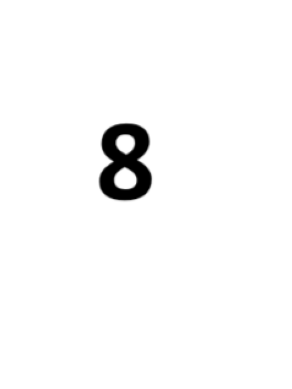

In [14]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Hide axis for better visualization
plt.show()

In [21]:
img = cv2.imread('untitled.png', cv2.IMREAD_GRAYSCALE)  # Read as grayscale
img = cv2.resize(img, (28, 28))  # Resize to match model input size
img = img / 255.0  # Normalize pixel values to [0,1]
img = np.reshape(img, (1, 28, 28, 1))

In [22]:
predictions = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [23]:
print(np.argmax(predictions))

8
